#### Question :

Given the night vision image as NightVision.jpg  
- Apply suitable filtering techniques to improve the contrast of the images.
- Generate a histogram of the image and observe how the intensity values are distributed
- Apply histogram equalization and matching

`Import the required libraries`

In [1]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

`Function to display the images`

In [2]:
def display(img,name):
    plt.title(name)
    plt.imshow(img,cmap='gray') 
    plt.axis('off')

`Read the image`

(199, 253, 3)


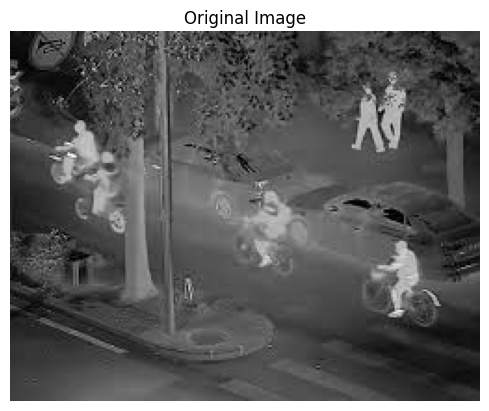

In [4]:
img = cv2.imread('Images/NightVision.jpg')
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
print(img.shape)
display(img,'Original Image')

In [5]:
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

`Using convertScalAbs`

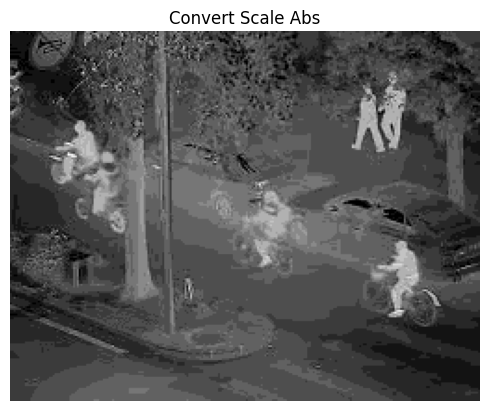

In [25]:
img_01 = cv2.convertScaleAbs(gray,alpha=0.05,beta=0)
display(img_01,'Convert Scale Abs')

` Using Gamma Correction`

 It is used for decreasing the influence of low intensity pixels.

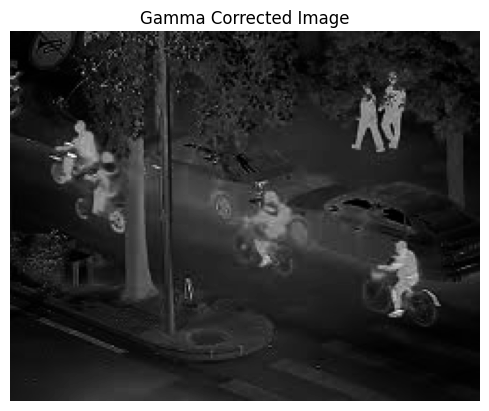

In [24]:
gamma = 1.75
img_02 = np.power(gray, gamma)
display(img_02,'Gamma Corrected Image')

`Using Contrast Stretching`

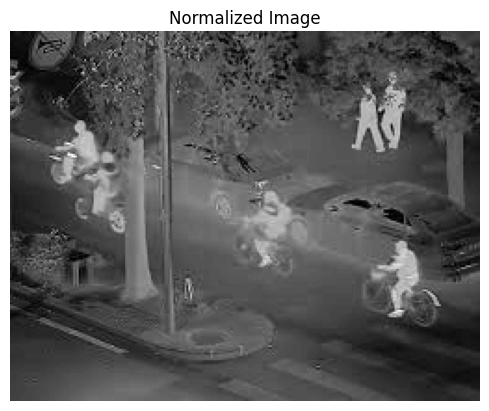

In [29]:
img_03 = cv2.normalize(gray, 2, 170, 255, cv2.NORM_MINMAX)
display(img_03,'Normalized Image')

`Using Logarithmic Transformation`

In [33]:
c = 255 / np.log(1 + np.max(gray))
log_transformed_img = c * (np.log(img_02 + 1.5))

In [34]:
log_transformed_img_normalized = ((log_transformed_img - np.min(log_transformed_img)) / (np.max(log_transformed_img) - np.min(log_transformed_img)) * 255).astype(np.uint8)

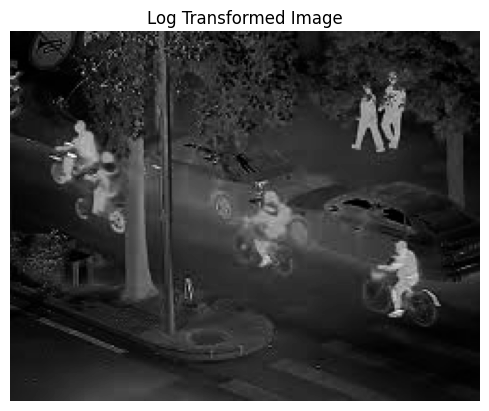

In [35]:
display(log_transformed_img_normalized,'Log Transformed Image')

`Using Piecewise Linear Transformation`

In [36]:
def piecewise_linear_transform(img, breakpoints, slopes):
    out_img = np.piecewise(img, [img < breakpoints[0], (img >= breakpoints[0]) & (img < breakpoints[1]), img >= breakpoints[1]], [lambda x: slopes[0] * x, lambda x: slopes[1] * (x - breakpoints[0]) + slopes[0] * breakpoints[0], lambda x: slopes[2] * (x - breakpoints[1]) + slopes[1] * (breakpoints[1] - breakpoints[0]) + slopes[0] * breakpoints[0]])
    return np.clip(out_img, 0, 255).astype(np.uint8)

In [37]:
breakpoints = [1, 0.5]
slopes = [1, 2, 1]
piecewise_img = piecewise_linear_transform(log_transformed_img_normalized, breakpoints, slopes)

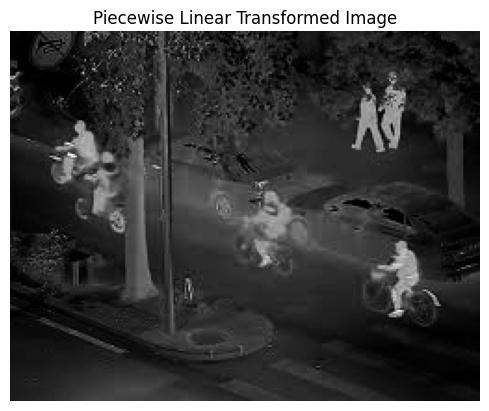

In [38]:
display(piecewise_img,'Piecewise Linear Transformed Image')

`Using Histogram Equalization`

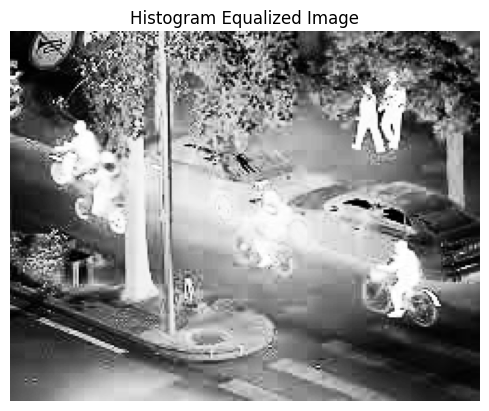

In [42]:
equ = cv2.equalizeHist(gray)
display(equ,'Histogram Equalized Image')

`Using Adaptive Histogram Equalization (CLAHE)`

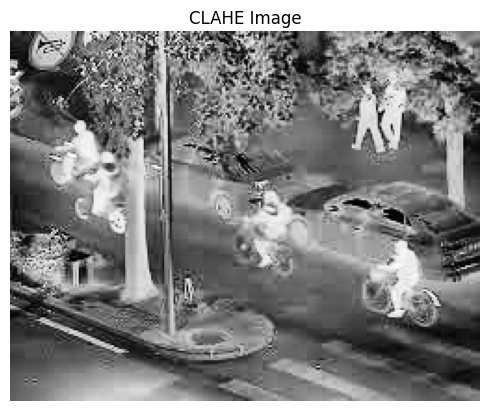

In [49]:
clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(5,5))
cl1 = clahe.apply(gray)

display(cl1,'CLAHE Image')

`Histogram of the Images`

Text(0, 0.5, 'Frequency')

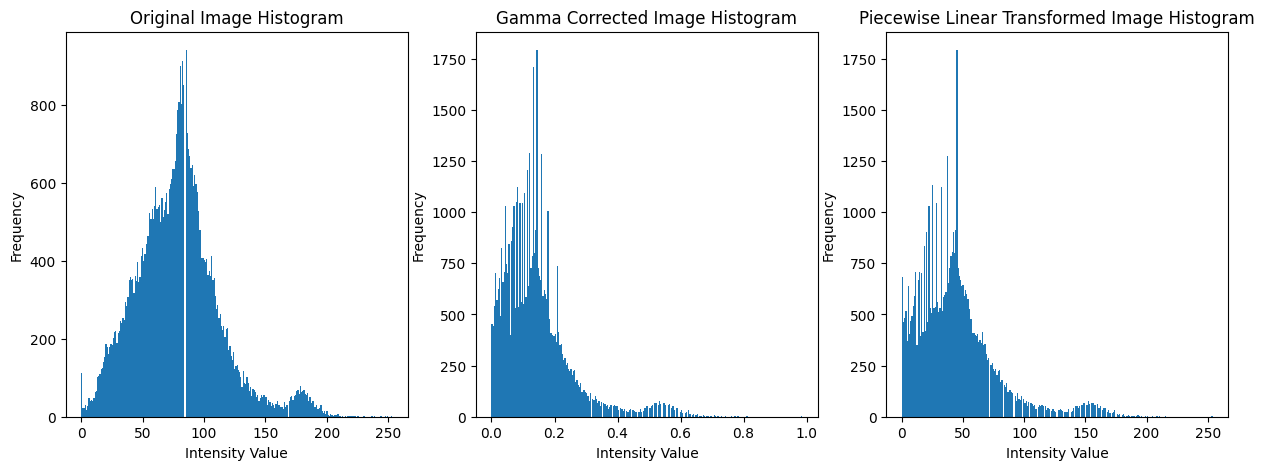

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(131)
plt.hist(gray.ravel(), bins=256) 
plt.title('Original Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(132)
plt.hist(img_02.ravel(), bins=256) 
plt.title('Gamma Corrected Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(133)
plt.hist(piecewise_img.ravel(), bins=256) 
plt.title('Piecewise Linear Transformed Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

`Histogram Equalization`

Text(0, 0.5, 'Frequency')

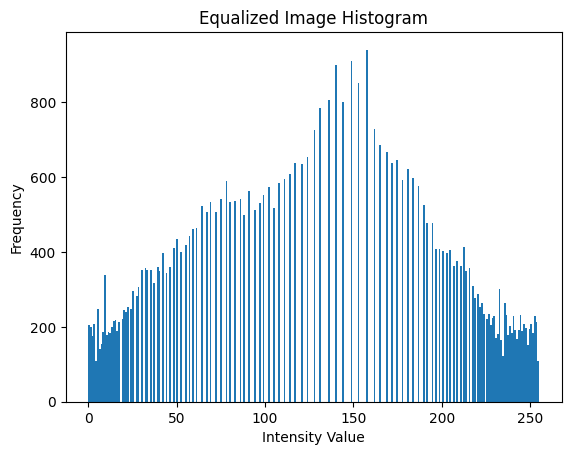

In [53]:
plt.hist(equ.ravel(), bins=256)
plt.title('Equalized Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

`Histogram Matching`

In [54]:
target_hist = cv2.calcHist([gray], [0], None, [256], [0, 256])
matched_img = cv2.calcHist([equ], [0], None, [256], [0, 256])

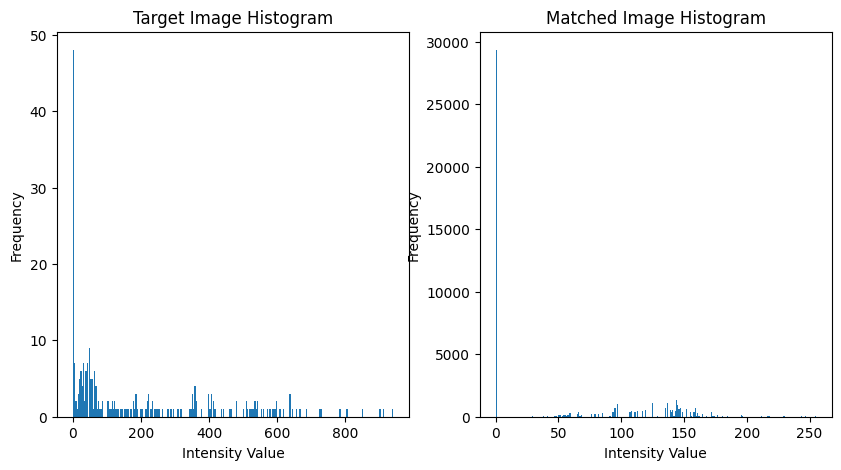

In [61]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(target_hist.ravel(), bins=256)
plt.title('Target Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(matched_img.ravel(), bins=256)
plt.title('Matched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()

In [59]:
matched_img = cv2.normalize(matched_img, matched_img, 0, 255, cv2.NORM_MINMAX).flatten()
matched_img = np.interp(gray.flatten(), np.arange(256), matched_img).reshape(gray.shape).astype(np.uint8)

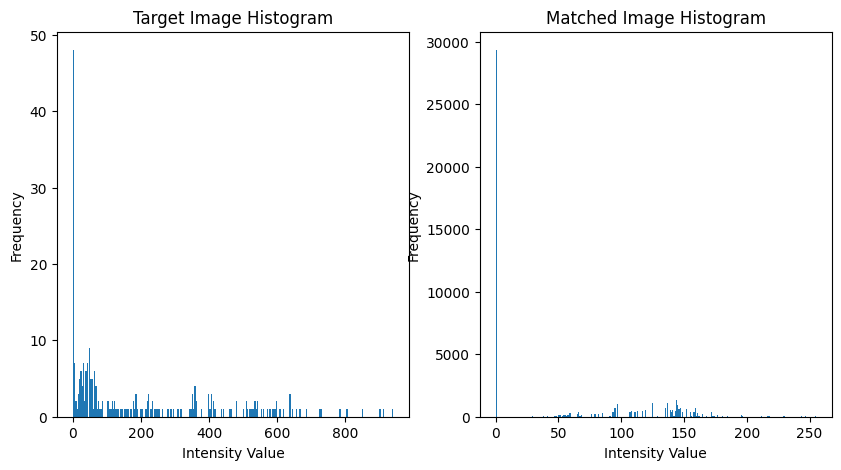

In [60]:
plt.figure(figsize=(10,5))

plt.subplot(121)
plt.hist(target_hist.ravel(), bins=256)
plt.title('Target Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.subplot(122)
plt.hist(matched_img.ravel(), bins=256)
plt.title('Matched Image Histogram')
plt.xlabel('Intensity Value')
plt.ylabel('Frequency')

plt.show()